<a href="https://colab.research.google.com/github/ShoukkiyaAshraf/Machine-Learning/blob/master/Logistic_Regression_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Iris Dataset

Multiclass-3 classes
Using softmax function

In [0]:
import numpy as np
import matplotlib as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression


In [4]:
iris=datasets.load_iris()
print(iris.DESCR)
print(iris.feature_names)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [69]:
x=iris['data'][:,(2,3)]
y=iris['target'] #taking only petal length and petal width 
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [0]:
''' total instances = 150 ie., 150/3=50
50 instances in each class '''
x_c1=x[:50] #dividing the data into 3 classes since we need classify the data into 3 classes --"Setosa,Versicolour,Virginica"  
x_c2=x[50:100]
x_c3=x[100:]
# similarly for y also :
y_c1=y[:50]   
y_c2=y[50:100]
y_c3=y[100:]


In [71]:
x_l1=np.array(x_c1[:40]) #taking first 40 values for training and other 10 values for testing
x_l2=np.array(x_c2[:40])
x_l3=np.array(x_c3[:40])
y_l1=np.array(y_c1[:40])
y_l2=np.array(y_c2[:40])
#creating a dummy array with label 1
y_dummy=np.array([1 for i in range(40)]).reshape(40,1)
x_train=np.concatenate([x_l1,x_l2,x_l3],axis=0)
y_train=np.concatenate([y_l1,y_l2,y_dummy],axis=None)
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [74]:
x_test1=np.array(x_c1[40:50]) #taking first 40 values for training and other 10 values for testing
x_test2=np.array(x_c2[40:50])
x_test3=np.array(x_c3[40:50])
y_test1=np.array(y_c1[40:])
y_test2=np.array(y_c2[40:])
#creating a dummy array with label 1
y_dummy_test=np.array([1 for i in range(10)]).reshape(10,1)
x_test=np.concatenate([x_test1,x_test2,x_test3],axis=0)
y_test=np.concatenate([y_test1,y_test2,y_dummy_test],axis=None)
print(y_test)


[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [77]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print(y_predict)
print(model.score(x_test,y_test))

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


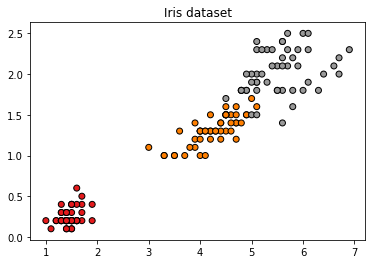

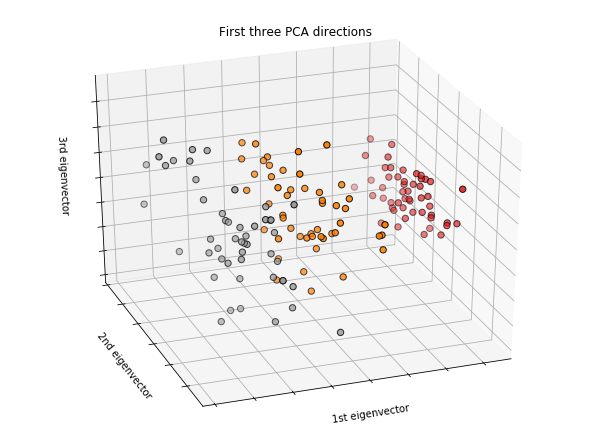

In [93]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


plt.title("Iris dataset")
plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.show()

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()